In [0]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.aqua.circuits.gates import mct
%matplotlib inline

In [0]:
q = QuantumRegister(32)
c = ClassicalRegister(14)
qc = QuantumCircuit(q,c)

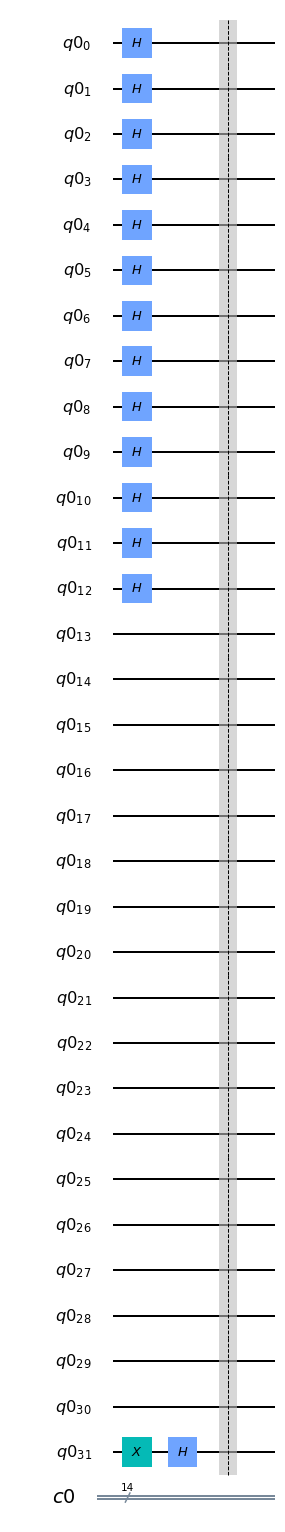

In [0]:

qc.h(q[0:13])
qc.x(q[31])
qc.h(q[31])#change phase sign
qc.barrier()
def comp(a,b,c,d,e,f,g): #g carries info, e,f are inversed to ancilla
    qc.cx(q[a],q[e])
    qc.cx(q[c],q[e])
    qc.cx(q[b],q[f])
    qc.cx(q[d],q[f])
    qc.x(q[e])
    qc.x(q[f])
    qc.ccx(q[e], q[f], q[g])
    qc.x(q[e])
    qc.x(q[f])
    qc.cx(q[d],q[f])
    qc.cx(q[b],q[f])
    qc.cx(q[c],q[e])
    qc.cx(q[a],q[e])

def comp2(a,b,c,d,e): #d is inversed to ancilla, e carries info, a is position 2
    qc.cx(q[a],q[d])
    qc.cx(q[b],q[d])
    qc.x(q[d])
    qc.ccx(q[c],q[d],q[e])
    qc.x(q[d])
    qc.cx(q[a],q[d])
    qc.cx(q[b],q[d])
def oo_check(a,b,c):
    qc.x(q[a])
    qc.x(q[b])
    qc.ccx(q[a],q[b],q[c])
    qc.x(q[a])
    qc.x(q[b])
def ol_check(a,b,c):
    qc.x(q[a])
    qc.ccx(q[a],q[b],q[c])
    qc.x(q[a])
    
qc.draw(output='mpl')

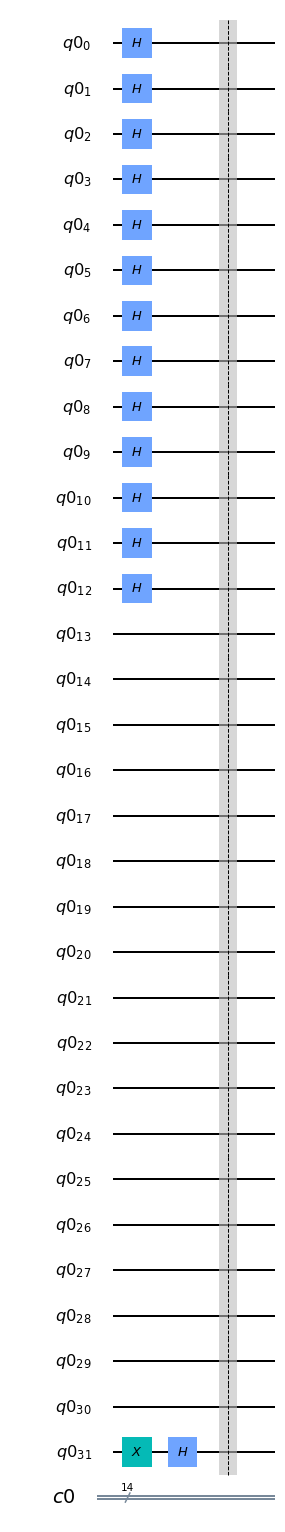

In [0]:
#comp2(4,0,1,13,15)
qc.draw(output='mpl')

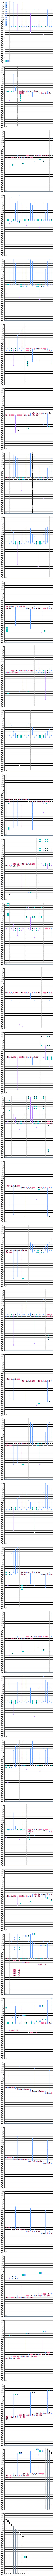

In [0]:
ite = 1 #number of iteration

for i in range(ite):
    comp2(4,0,1,13,15) #2 and 0
    comp2(4,5,6,13,16) #2 and 3
    comp2(4,9,10,13,17) #2 and 5
    comp2(4,11,12,13,18) #2 and 6

    #15 to 18 must be null circle to make sure if 19 gives 1 to become the infor bit
    qc.barrier()
    qc.x(q[15:19])
    qc.mct([q[15],q[16],q[17],q[18]], q[19] , [q[13],q[14]], mode='basic') 
    qc.x(q[15:19])
    qc.barrier()
    comp2(4,0,1,13,15) #reuse 15
    comp2(4,5,6,13,16) #reuse 16
    comp2(4,9,10,13,17) #reuse 17
    comp2(4,11,12,13,18) #reuse 18

    comp(0,1,2,3,13,14,20) # 0 and 1
    comp(0,1,5,6,13,14,21) # 0 and 3
    comp(2,3,5,6,13,14,22) # 1 and 3

    qc.barrier()
    qc.x(q[20:23])
    qc.mct([q[19],q[20],q[21],q[22]], q[23] , [q[13],q[14]], mode='basic') 
    qc.x(q[20:23])
    qc.barrier()
  
    comp(0,1,2,3,13,14,20) # reuse 20
    qc.barrier()

    comp(2,3,7,8,13,14,24) #1 and 4
    comp(5,6,7,8,13,14,25) #3 and 4
    comp(5,6,9,10,13,14,26) #3 and 5
    qc.barrier()
    qc.x(q[24:27])
    qc.mct([q[23],q[24],q[25],q[26]], q[27] , [q[13],q[14]], mode='basic')  
    qc.x(q[24:27])
    qc.barrier()
    comp(5,6,11,12,13,14,28) # 3 and 6
    comp(7,8,11,12,13,14,29) # 4 and 6

    qc.barrier()

    comp(9,10,11,12,13,14,15)# 5 and 6 
    qc.barrier()
    #the compare info is on qubit20
    qc.x(q[28:30])
    qc.x(q[15])
    qc.mct([q[27],q[28],q[29],q[15]], q[20] , [q[13],q[14]], mode='basic')
    qc.x(q[28:30])
    qc.x(q[15])
    qc.barrier()


    #intial state for 0 and 3
    qc.barrier()
    oo_check(0,1,13)
    oo_check(5,6,14)
    oo_check(13,14,16)
    oo_check(5,6,14) #flip back 13 and 14 to reuse them
    oo_check(0,1,13)

    #initial state for 5 and 6
    qc.barrier()
    qc.ccx(9,10,13)
    qc.ccx(11,12,14)
    oo_check(13,14,17)
    qc.ccx(11,12,14)
    qc.ccx(9,10,13)

    #initial state for 1 and 4
    qc.barrier()
    ol_check(2,3,13)
    ol_check(7,8,14)
    oo_check(13,14,18)
    ol_check(7,8,14)
    ol_check(2,3,13)

    # the initial state info in on qubit 30
    qc.barrier()
    qc.mct([q[16],q[17],q[18]], q[30] , [q[13]], mode='basic')

    #phase flip
    qc.ccx(q[20],q[30],q[31])

  
    #the rest to make a big turn over
    qc.barrier()
    qc.mct([q[16],q[17],q[18]], q[30] , [q[13]], mode='basic')

    #initial state for 1 and 4
    qc.barrier()
    ol_check(2,3,13)
    ol_check(7,8,14)
    oo_check(13,14,18)
    ol_check(7,8,14)
    ol_check(2,3,13)
    #initial state for 5 and 6
    qc.barrier()
    qc.ccx(9,10,13)
    qc.ccx(11,12,14)
    oo_check(13,14,17)
    qc.ccx(11,12,14)
    qc.ccx(9,10,13)

    #intial state for 0 and 3
    qc.barrier()
    oo_check(0,1,13)
    oo_check(5,6,14)
    oo_check(13,14,16)
    oo_check(5,6,14) #flip back 13 and 14 to reuse them
    oo_check(0,1,13)

    qc.barrier()
    qc.x(q[28:30])
    qc.x(q[15])
    qc.mct([q[27],q[28],q[29],q[15]], q[20] , [q[13],q[14]], mode='basic')
    qc.x(q[28:30])
    qc.x(q[15])
    qc.barrier()
    
    comp(9,10,11,12,13,14,15)#  5 and 6
    comp(7,8,11,12,13,14,29) # 4 and 6
    comp(5,6,11,12,13,14,28) # 3 and 6
    qc.barrier()
    qc.x(q[24:27])
    qc.mct([q[23],q[24],q[25],q[26]], q[27] , [q[13],q[14]], mode='basic')  
    qc.x(q[24:27]) 
    qc.barrier()
    comp(2,3,7,8,13,14,24) #1 and 4
    comp(5,6,7,8,13,14,25) #3 and 4
    comp(5,6,9,10,13,14,26) #3 and 5 
    comp(0,1,2,3,13,14,20)   
    qc.barrier()
    qc.x(q[20:23])
    qc.mct([q[19],q[20],q[21],q[22]], q[23] , [q[13],q[14]], mode='basic') 
    qc.x(q[20:23])
    qc.barrier()
    comp(0,1,2,3,13,14,20) # 0 and 1
    comp(0,1,5,6,13,14,21) # 0 and 3
    comp(2,3,5,6,13,14,22) # 1 and 3
    qc.barrier()
    comp2(4,0,1,13,15) #reuse 15
    comp2(4,5,6,13,16) #
    comp2(4,9,10,13,17) 
    comp2(4,11,12,13,18)
    qc.barrier()
    qc.x(q[15:19])
    qc.mct([q[15],q[16],q[17],q[18]], q[19] , [q[13],q[14]], mode='basic') 
    qc.x(q[15:19])
    qc.barrier()
    comp2(4,0,1,13,15) #2 and 0
    comp2(4,5,6,13,16) #2 and 3
    comp2(4,9,10,13,17) #2 and 5
    comp2(4,11,12,13,18) #2 and 6
    #final inverse
    qc.h(q[0:13])
    qc.x(q[0:13])
    qc.h(q[12])#HXH=Z to reduce u3 gate
    qc.mct([q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11]], q[12],[q[13],q[14],q[15],q[16],q[17],q[18],q[19],q[20],q[21],q[22]], mode='basic')
    qc.h(q[12])#HXH=Z to reduce u3 gate 
    qc.x(q[0:13])
    qc.h(q[0:13])
    qc.barrier()
    

qc.measure(q[0:5], c[0:5])
qc.x(q[23])
qc.measure(q[23], c[5])
qc.measure(q[5:13], c[6:14])
qc.draw(output='mpl',scale=0.5)

In [0]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
#job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

NameError: name 'job' is not defined

In [0]:
# Input your quantum circuit
circuit=qc
# Input your result of the execute(groverCircuit, backend=backend, shots=shots).result()
results = result #'Input your result'
count=results.get_counts()
# Provide your team name
name= 'ERICQC' #'Input your team name as exactly as you inputted it in the team details form'
# Please indicate the number of times you have made a submission so far. 
# For example, if it's your 1st time to submit your answer, write 1. If it's your 5th time to submit your answer, write 5.
times='21'#'Input the number of times you have made your submissions so far'


In [0]:

import json
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Unroll the circuit
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(circuit) 

# obtain gates
gates=new_circuit.count_ops()

#sort count
count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

# collect answers with Top 9 probability
ans_list = count_sorted[0:9]

# reverse ans_list
ans_reversed = []
for i in ans_list:
    ans_temp=[i[0][::-1],i[1]]
    ans_reversed.append(ans_temp)

# convert each 2 bits into corresponding color. Add node0(0),node3(1),node8(2) and node11(3)
ans_shaped = []
for j in ans_reversed:
    ans_temp=j[0]
    nodeA = 0
    node0 = int(ans_temp[0] + ans_temp[1], 2)
    node1 = int(ans_temp[2] + ans_temp[3], 2)
    nodeB = 1
    node2 = int(ans_temp[4] + ans_temp[5], 2)
    node3 = int(ans_temp[6] + ans_temp[7], 2)
    node4 = int(ans_temp[8] + ans_temp[9], 2)
    nodeC = 2
    node5 = int(ans_temp[10] + ans_temp[11], 2)
    node6 = int(ans_temp[12] + ans_temp[13], 2)
    nodeD = 3
    nodes_color = str(nodeA) + str(node0) + str(node1) + str(nodeB) + str(node2) + str(node3) + str(node4) + str(nodeC) + str(node5) + str(node6) + str(nodeD) 
    ans_shaped.append([nodes_color,j[1]])

# write the result into '[your name]_final_output.txt'
filename=name+'_'+times+'_final_output.txt'
dct={'ans':ans_shaped,'costs':gates}
with open(filename, 'w') as f:
    json.dump(dct, f)
